# Global thresholding 

In [ ]:
#using built in
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = input("enter image file:: ")  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or unable to load.")

# Set the threshold value
threshold_value = int(input("enter threshold value:: "))  # Example threshold value

# Apply global thresholding
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
#without using built in
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to perform global thresholding without built-in function
def global_thresholding_manual(image_path, threshold_value):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    rows,cols=image.shape
    
    if image is None:
        raise ValueError("Image not found or unable to load.")
    
    # Iterate over each pixel and apply the threshold
    for i in range(rows):
        for j in range(cols):
            if image[i, j] > threshold_value:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0

    return image, thresholded_image

# Function to display the original and thresholded images
def display_images(original, thresholded):
    # Display the original and thresholded images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Thresholded Image')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage
image_path = input("enter image file:: ")  # Replace with the path to your image
threshold_value = 150  # Example threshold value
original, thresholded = global_thresholding_manual(image_path, threshold_value)
display_images(original, thresholded)


# Local Thresholding

In [ ]:
#local thresholding without built in

import numpy as np
import matplotlib.pyplot as plt
import cv2

def calculate_local_threshold(block):
    """Calculate the local threshold for a block of the image."""
    return np.mean(block)  # Use the mean intensity value of the block as the local threshold

def local_thresholding(image, block_size):
    height, width = image.shape
    binary_image = np.zeros_like(image)
   
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i+block_size, j:j+block_size]
            local_thresh = calculate_local_threshold(block)
           
            for x in range(block.shape[0]):
                for y in range(block.shape[1]):
                    if block[x, y] > local_thresh:
                        binary_image[i + x, j + y] = 255
                    else:
                        binary_image[i + x, j + y] = 0
   
    return binary_image

image_path = 'sunflower.jpg'
   
# Block size for local thresholding
block_size = 16  # You can adjust this value as needed
   
# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
# Apply local thresholding
binary_image = local_thresholding(original_image, block_size)
   
plt.figure(figsize=[10, 5])
   
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Local Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

In [ ]:
#Local thresholding with built in

import numpy as np
import matplotlib.pyplot as plt
import cv2

def local_thresholding(image, block_size, C):
    """Apply local thresholding using OpenCV's adaptiveThreshold."""
    binary_image = cv2.adaptiveThreshold(
        image,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        block_size,
        C
    )
    return binary_image

image_path = 'sunflower.jpg'

# Block size for local thresholding (must be odd and greater than 1)
block_size = 16  # You can adjust this value as needed
if block_size % 2 == 0:  # Ensure block size is odd
    block_size += 1

# Constant subtracted from the mean (you can adjust this value as needed)
C = 2

# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply local thresholding
binary_image = local_thresholding(original_image, block_size, C)

# Display the images
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Local Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

# Sobel Edge detection

In [ ]:
#with built in
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'sunflower.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or unable to load.")

# Apply Sobel operator in the x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the original and Sobel images
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title('Sobel Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

plt.show()


# prewitt Edge detection

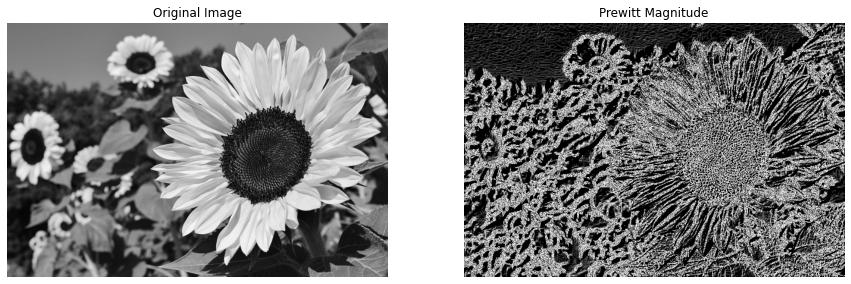

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'sunflower.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or unable to load.")

# Define Prewitt kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]],dtype=np.float32)

prewitt_x=cv2.filter2D(image, -1, kernel_x)
prewitt_y=cv2.filter2D(image, -1, kernel_y)

# Calculate the gradient magnitude
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_magnitude = np.uint8(prewitt_magnitude)   # Convert to uint8 for visualization
# Display the original and Prewitt images
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')



plt.subplot(1, 2, 2)
plt.title('Prewitt Magnitude')
plt.imshow(prewitt_magnitude , cmap='gray')
plt.axis('off')

plt.show()


# Robert Edge detection

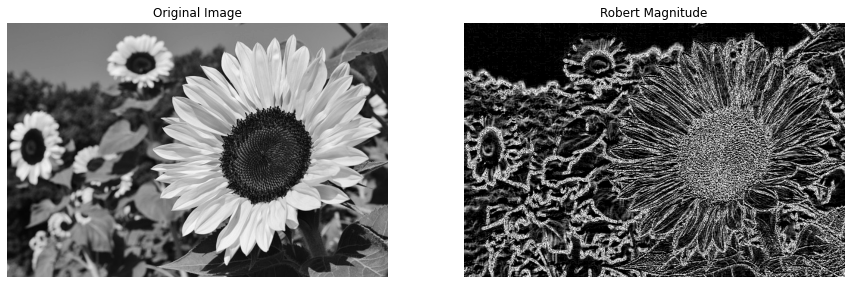

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'sunflower.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found or unable to load.")

# Roberts Cross kernels
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

# Apply convolution using the Roberts Cross kernels
roberts_x = cv2.filter2D(image, -1, kernel_x)
roberts_y = cv2.filter2D(image, -1, kernel_y)

# Calculate the gradient magnitude
roberts_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)
roberts_magnitude = np.uint8(roberts_magnitude)

# Display the original and Roberts edge detection result
plt.figure(figsize=[15, 10])

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Robert Magnitude')
plt.imshow(roberts_magnitude , cmap='gray')
plt.axis('off')


plt.show()


# Laplacian Edge detection

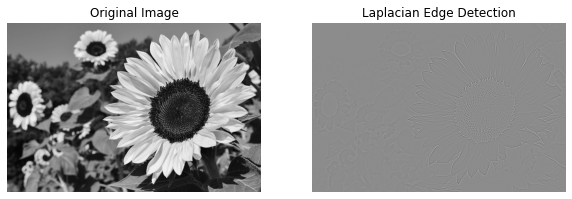

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'sunflower.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found or unable to load.")

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and Laplacian edge detection result
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()


# Zero_cross Edge detection

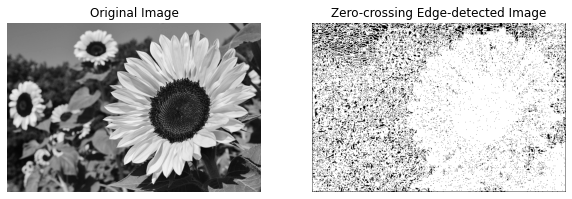

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Find zero-crossings in the Laplacian image
rows, cols = laplacian.shape
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        neighbors = [laplacian[i-1, j], laplacian[i+1, j], laplacian[i, j-1], laplacian[i, j+1],
                     laplacian[i-1, j-1], laplacian[i-1, j+1], laplacian[i+1, j-1], laplacian[i+1, j+1]]
        if np.any(np.multiply(neighbors, laplacian[i, j]) < 0):
            zero_crossings[i, j] = 255

# Display the original and zero-crossing edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(zero_crossings, cmap='gray')
plt.title('Zero-crossing Edge-detected Image')
plt.axis('off')

plt.show()


# Canny Edge detection

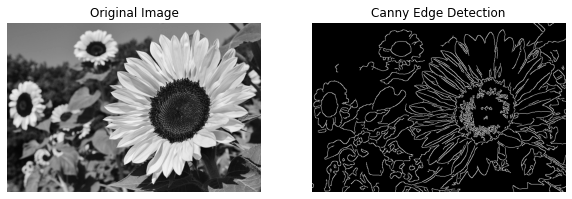

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'sunflower.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blur=cv2.GaussianBlur(image,(5,5),0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 50, 150)  # Adjust threshold values as needed

# Display the original and Canny edge detection result
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


# Segmentation

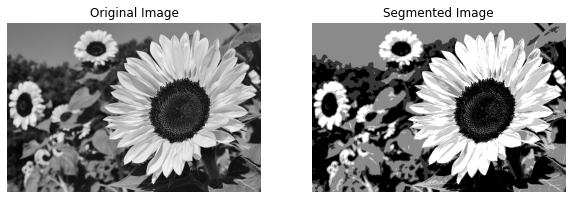

In [16]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 1))

# Convert to float32
pixels = np.float32(pixels)

# Define criteria and apply k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)

# Map the labels to their respective centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()



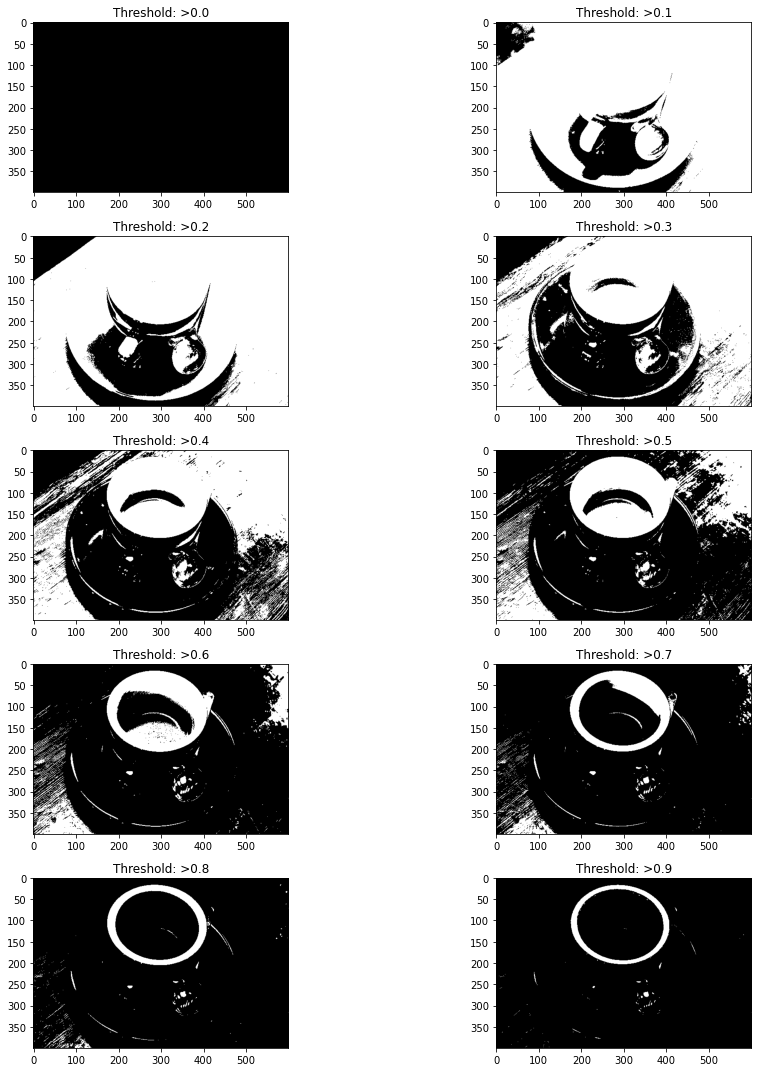

In [21]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):

# Iterating different thresholds
    binarized_gray = (gray_coffee > i*0.1)*1
    plt.subplot(5,2,i+1)

# Rounding of the threshold
# value to 1 decimal point
    plt.title("Threshold: >"+str(round(i*0.1,1)))

# Displaying the binarized image
# of various thresholds
    plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()
